> # MAKE SURE YOU RUN ON **GPU**!!!: *Select* **Runtime** -> **Change Runtime Type** -> *Select* **GPU** as your hardware acclerator!

> In Lesson 6 Proximal Policy Optimization (PPO), you will learn:
    > - What is PPO?
    > - How does PPO work?

In [1]:
!pip install cmake swig
!pip install gymnasium[Box2D]==0.28.1
!pip install rl_zoo3==2.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 39.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2373073 sha256=1a73afa6c3d5e4574e99cf30e292e10f61e8a108de95c7e4509d076208c5663a
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.3/76.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 23.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

- In the last lesson, we have talk about how **A2C** combined both value-based and policy-based methods to help stabilize the training process.

- In this lesson, we will learn an other way to stabilize RL agent training: **PPO**, which stands for Proximal Policy Optimization.

- General Idea:  we don't want to update our policy too much by restraining our policy update in a defined range. ($[1-ϵ, 1+ϵ]$)

![PPO by Jonathan HUi](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit9/cliff.jpg)

<!-- - This would be similar to what HuggingFace did for their explanation, which is an adaption of the explanation provided by Jonathan Hui, i.e., HF added this: "Modified version from RL — Proximal Policy Optimization (PPO) Explained by Jonathan Hui". [PPO by Jonathan Hui](https://jonathan-hui.medium.com/rl-proximal-policy-optimization-ppo-explained-77f014ec3f12) -->


- As presented by this image, we will update our policy carefully in PPO has 2 main benefits:
    - Avoid **falling** off the cliff (hurts performance)
    - More likely to **converge** (reaching) an optimal solution.
    
- One way you can picture this is in the *gradient descent*, there is a hyperparameter called **learning rate**, which control how big of a step you will take in updating your parameters. 
    - Too small step, slow training process
    - Too big step, unstable training process


So in **PPO**, you are trying to avoid too much deviation on your *new* policy compared to the *old* policy in your policy update. Hence the term "Proximal Policy". For specific detail of how this will work see [ Clipped surrogate objective function](https://huggingface.co/learn/deep-rl-course/unit8/clipped-surrogate-objective).





We will use PPO to train a [Bipedal Walker](https://gymnasium.farama.org/environments/box2d/bipedal_walker/)!!! Though we can use the PPO algorithm inside  [rl-baseline3-zoo](https://github.com/DLR-RM/rl-baselines3-zoo) to train our agent!

![Bipedal Walker](https://gymnasium.farama.org/_images/bipedal_walker.gif)

We are going to train a Bipedal Walker using PPO (1000 steps) and saved it to "/content/BipedalWalker" !

In [2]:
!python -m rl_zoo3.train --algo ppo --env BipedalWalker-v3 --n-timesteps 1000 --progress -f "/content/BipedalWalker"

2023-08-11 18:48:51.827879: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 18:48:52.724891: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
========== BipedalWalker-v3 ==========
Seed: 3523475310
Loading hyperparameters from: /usr/local/lib/python3.10/dist-packages/rl_zoo3/hyperparams/ppo.yml
Default hyperparameters for environment (ones being tuned will be overridden):
OrderedDict([('batch_size', 64),
             ('clip_range', 0.18),
             ('ent_coef', 0.0),
             ('gae_lambda', 0.95),
             ('gamma', 0.999),
             ('learning_rate', 0.0003),
             ('n_envs', 32),
             ('n_epochs', 10),
             ('n_steps', 2048),
             ('n_timesteps', 5000

Next, we are going to load the parameters of the *best model* and look at how well our agent performs!

In [3]:
from stable_baselines3 import PPO
import gymnasium as gym

env = gym.make("BipedalWalker-v3", render_mode='rgb_array')
model = PPO(policy="MlpPolicy", env="BipedalWalker-v3")
model.set_parameters(load_path_or_dict="/content/BipedalWalker/ppo/BipedalWalker-v3_1/best_model.zip")

In [ ]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

obs = env.reset()[0]
img = plt.imshow(env.render())

while True:
    action, _states = model.predict(obs, deterministic=False)
    obs, rewards, dones, info,_ = env.step(action)
    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    if dones:
      break

env.close()

Let's compare how well the pre-trained agent from HuggingFace performs!

In [10]:
!python -m rl_zoo3.load_from_hub --algo ppo --env BipedalWalker-v3 -orga sb3 -f "/content/pre-trained"

2023-08-11 18:54:36.483268: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Saving to /content/pre-trained/ppo/BipedalWalker-v3_1


In [16]:
env = gym.make("BipedalWalker-v3", render_mode='rgb_array')
model = PPO(policy="MlpPolicy", env="BipedalWalker-v3")
model.set_parameters(load_path_or_dict="/content/pre-trained/ppo/BipedalWalker-v3_1/BipedalWalker-v3.zip")

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object learning_rate. Consider using `custom_objects` argument to replace this object.
Exception: 'bytes' object cannot be interpreted as an integer
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: 'bytes' object cannot be interpreted as an integer
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: 'bytes' object cannot be interpreted as an integer
  warnings.warn(


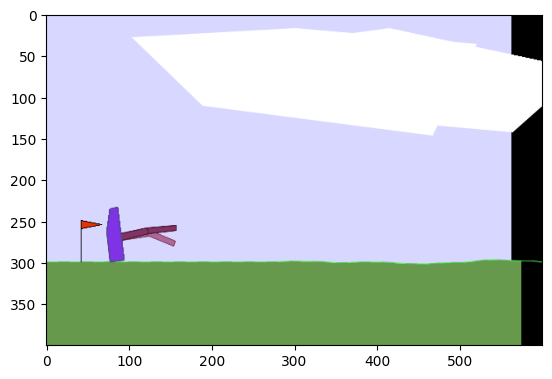

In [17]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

obs = env.reset()[0]
img = plt.imshow(env.render())

while True:
    action, _states = model.predict(obs, deterministic=False)
    obs, rewards, dones, info,_ = env.step(action)
    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    if dones:
      break

env.close()

We can also train and visualize the model using Stable Baseline 3!

In [ ]:
from stable_baselines3 import PPO
import gymnasium as gym

# Create the BipedalWalker environment
env = env = gym.make("BipedalWalker-v3")

# Instantiate the agent
model = PPO('MlpPolicy', env, verbose=1)

# Train the agent for 100 timesteps
model.learn(total_timesteps=100)

# Save the trained agent
model.save("PPO-BipedalWalker")

# delete the model from memory
del model

In [ ]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# load the model
model = PPO.load("PPO-BipedalWalker")

# Create the BipedalWalker environment
env = gym.make("BipedalWalker-v3", render_mode="rgb_array")

# reset the environment
obs = env.reset()[0]

img = plt.imshow(env.render()) # only call this once

while True:

  img.set_data(env.render()) # just update the data
  display.display(plt.gcf())
  display.clear_output(wait=True)

  action, _states = model.predict(obs)  # predict the action and state using the model
  obs, rewards, terminated, info, _ = env.step(action) # take the predicted action

  if terminated :
    break

env.close()

### Reference
1. [HuggingFace RL Course Unit 8](https://huggingface.co/learn/deep-rl-course/unit8/introduction)
